In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [2]:
train_data_path = 'dataset/train/'
val_data_path = 'dataset/valid/'
test_data_path = 'dataset/test/'

In [3]:
classes = ['Green Light',
           'Red Light',
           'Speed Limit 10',
           'Speed Limit 100',
           'Speed Limit 110',
           'Speed Limit 120',
           'Speed Limit 20',
           'Speed Limit 30',
           'Speed Limit 40',
           'Speed Limit 50',
           'Speed Limit 60',
           'Speed Limit 70',
           'Speed Limit 80',
           'Speed Limit 90',
           'Stop'
]

In [6]:
def photo_visualization(indices, selection='train'):

    plt.figure(figsize=(15, 12))
    selection = os.path.join('dataset', selection)

    images = np.array(os.listdir(os.path.join(selection, 'images')))[indices]
    labels = np.array(os.listdir(os.path.join(selection, 'labels')))[indices]

    num_images = len(indices)
    cols = min(num_images, 5)

    # Добавляем строку, если есть остаток
    rows = num_images // cols + (num_images % cols > 0)

    for index, (img, box_txt) in enumerate(zip(images, labels)):

        with open(os.path.join(selection, 'labels', box_txt), 'r') as box_file:
            label, x_center, y_center, w, h = map(float, box_file.readline().split())

        img_path = os.path.join(selection, 'images', img)
        img_cv = cv2.imread(img_path)

        height, width, _ = img_cv.shape

        # Переводим нормализованные координаты в координаты пикселей
        x = int((x_center - w / 2) * width)
        y = int((y_center - h / 2) * height)
        w = int(w * width)
        h = int(h * height)

        img_cv = cv2.rectangle(img_cv, (x, y), (x + w, y + h), (0, 255, 0), 5)
        plt.subplot(rows, cols, index + 1)
        plt.title(classes[int(label)])
        plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

        plt.axis('off')

    plt.tight_layout()
    plt.show()


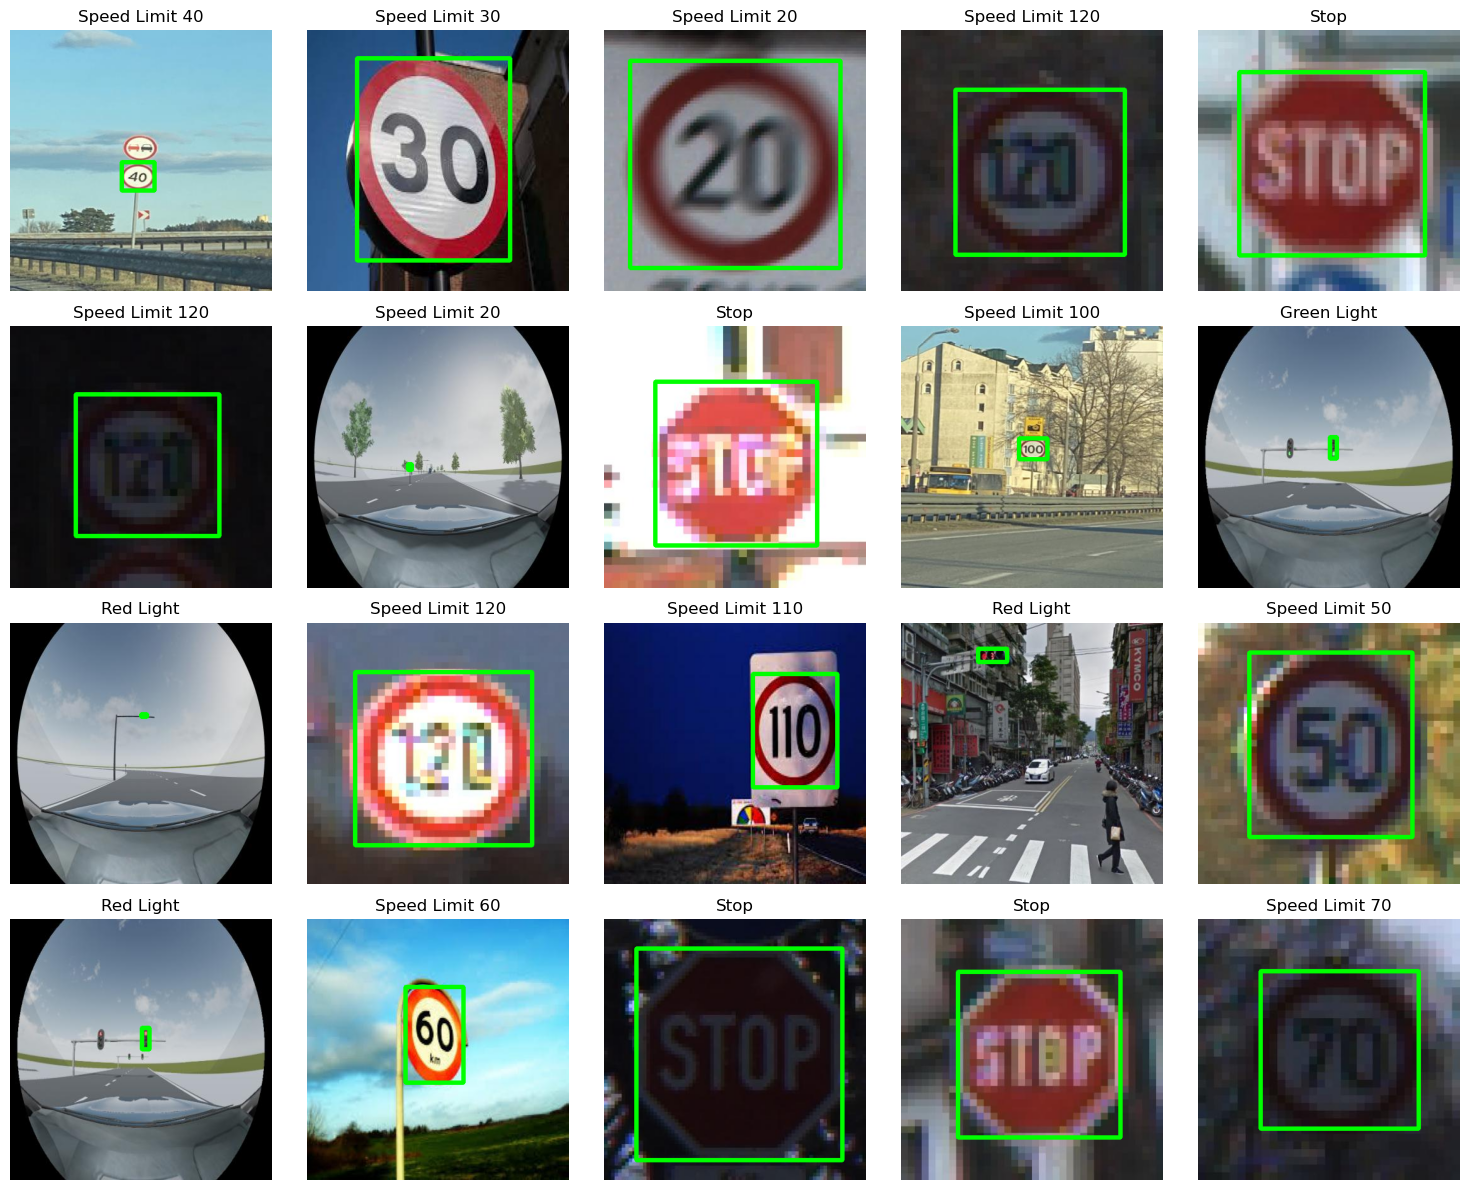

In [7]:
count_photo = 20
sample = 'train'
indices = np.random.choice(np.arange(len(os.listdir('dataset/' + sample + '/images'))), count_photo)
# Визуализация
photo_visualization(indices, sample)

# Train YOLO

In [12]:
model = YOLO('yolov8s.pt')

In [22]:
results = model.train(data='dataset/dataset.yaml', epochs=20, imgsz=416)

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset/dataset.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 26.7MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 87.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Traffic Sings Detection | YOLO V8/dataset/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [01:04<00:00, 54.88it/s] 


train: New cache created: /content/drive/MyDrive/Colab Notebooks/Traffic Sings Detection | YOLO V8/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/Traffic Sings Detection | YOLO V8/dataset/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:09<00:00, 80.88it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/Traffic Sings Detection | YOLO V8/dataset/valid/labels.cache
Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.87G     0.8341      2.901       1.09         22        416: 100%|██████████| 221/221 [01:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]

                   all        801        944      0.376      0.449      0.367      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.95G     0.7253      1.669      1.012         18        416: 100%|██████████| 221/221 [01:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]

                   all        801        944      0.565      0.548      0.571      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.94G     0.7095      1.405     0.9964         19        416: 100%|██████████| 221/221 [01:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]

                   all        801        944      0.666      0.582      0.639      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.95G     0.7115      1.254     0.9946         17        416: 100%|██████████| 221/221 [01:09<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944       0.79      0.715      0.778       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.95G     0.7045      1.153     0.9886         20        416: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]

                   all        801        944      0.871      0.653      0.782      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.93G     0.6617      1.059     0.9756         23        416: 100%|██████████| 221/221 [01:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]

                   all        801        944      0.835      0.736      0.822      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.95G     0.6492     0.9701     0.9674         27        416: 100%|██████████| 221/221 [01:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]

                   all        801        944       0.89      0.789      0.861      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.94G     0.6501     0.9111     0.9726         16        416: 100%|██████████| 221/221 [01:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.885      0.802      0.862      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.94G      0.618     0.8659     0.9612         11        416: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.901      0.796      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.93G     0.6173     0.8453     0.9547         27        416: 100%|██████████| 221/221 [01:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.909      0.808      0.883      0.752


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.94G     0.5957     0.5641     0.9082         10        416: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]

                   all        801        944      0.935      0.783       0.88      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.95G     0.5759     0.5247     0.8995          9        416: 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.64it/s]

                   all        801        944      0.889      0.832      0.883       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.95G      0.567      0.501     0.8979         11        416: 100%|██████████| 221/221 [01:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]

                   all        801        944      0.913      0.808      0.889      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.93G     0.5543     0.4659     0.8898         10        416: 100%|██████████| 221/221 [01:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]

                   all        801        944      0.927      0.826      0.899      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.94G      0.542     0.4297     0.8839         11        416: 100%|██████████| 221/221 [01:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]

                   all        801        944      0.934      0.852      0.916      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.95G     0.5291     0.4029     0.8824         10        416: 100%|██████████| 221/221 [01:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]

                   all        801        944      0.927      0.842      0.913      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.95G     0.5234     0.3907     0.8782         11        416: 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]

                   all        801        944      0.926      0.877      0.932      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.93G     0.5107     0.3595     0.8744         10        416: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]

                   all        801        944      0.938      0.873      0.928      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.95G     0.5019     0.3451     0.8739         10        416: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]

                   all        801        944      0.956      0.862      0.936      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.94G     0.4905     0.3299     0.8661         14        416: 100%|██████████| 221/221 [01:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]

                   all        801        944      0.954       0.86      0.937      0.811



20 epochs completed in 0.434 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 22.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]


                   all        801        944      0.954       0.86      0.937      0.811
           Green Light        801        122      0.866      0.689      0.783      0.459
             Red Light        801        108      0.843      0.595      0.717      0.418
       Speed Limit 100        801         52       0.93      0.904      0.976      0.886
       Speed Limit 110        801         17      0.911      0.824      0.918      0.838
       Speed Limit 120        801         60      0.983      0.952      0.994       0.91
        Speed Limit 20        801         56      0.982      0.893       0.98       0.87
        Speed Limit 30        801         74      0.976      0.959      0.984      0.923
        Speed Limit 40        801         55      0.971      0.909       0.99      0.886
        Speed Limit 50        801         71      0.999      0.873      0.966      0.865
        Speed Limit 60        801         76      0.967      0.895      0.954      0.873
        Speed Limit 7

# Results

In [8]:
path = 'runs/detect/train7/'

In [9]:
os.listdir(path)

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'events.out.tfevents.1706348460.DESKTOP-CTI4TK2.8228.1',
 'events.out.tfevents.1706424235.07b54ceb7c8d.204.0',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'train_batch2210.jpg',
 'train_batch2211.jpg',
 'train_batch2212.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'weights']

In [10]:
metrics = [file for file in os.listdir(path) if os.path.splitext(file)[-1] == '.png']

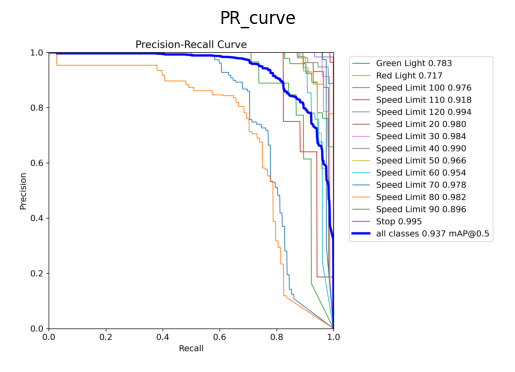

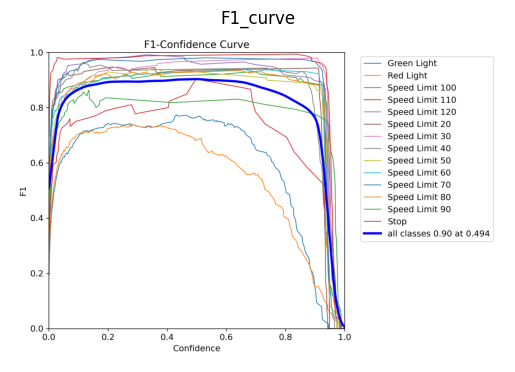

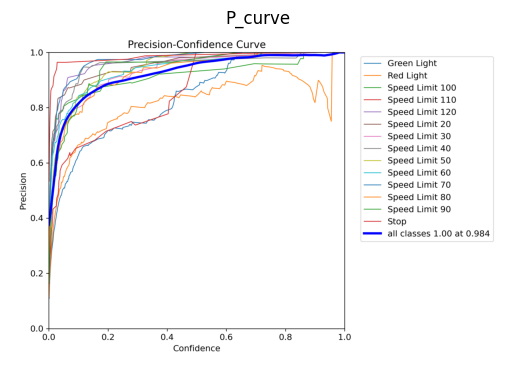

In [45]:
for index, file in enumerate(metrics[:-4]):
    img = Image.open(path + file)
    plt.title(os.path.splitext(file)[0])
    plt.imshow(img)
    plt.axis('off')
    plt.show()


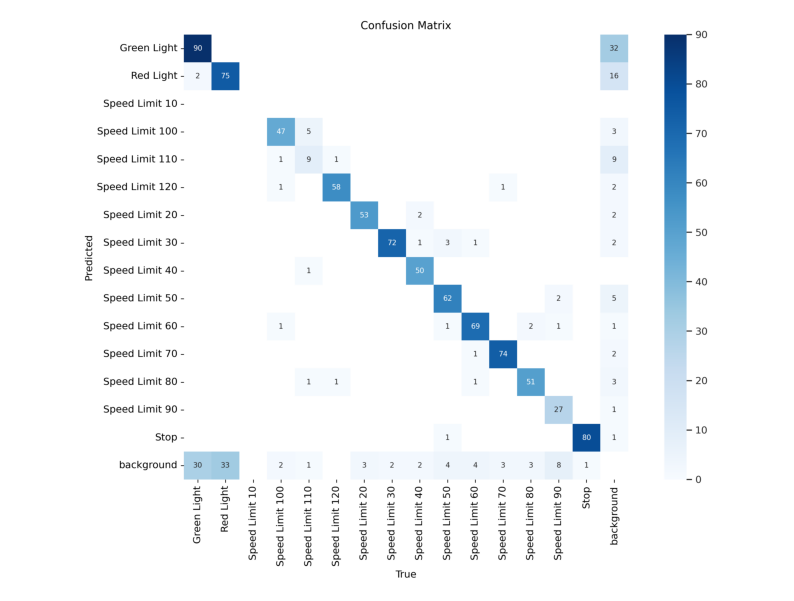

In [50]:
plt.figure(figsize=(10,10))
results_metrics_conf = Image.open(path + metrics[-2])
plt.imshow(results_metrics_conf);
plt.axis('off');

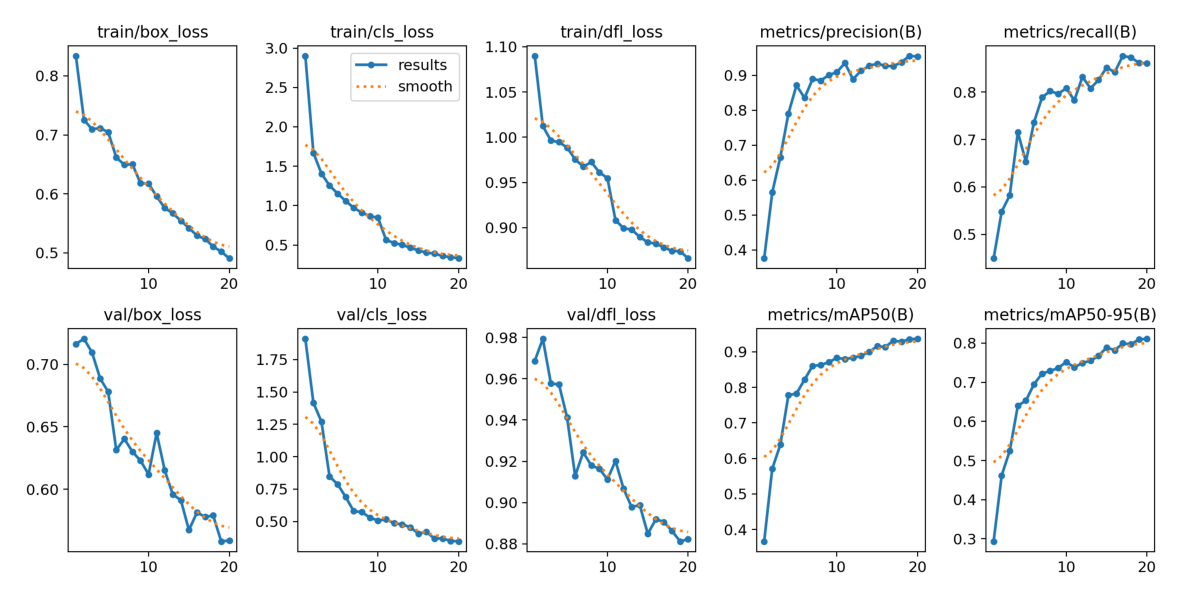

In [51]:
plt.figure(figsize=(15,12))
results_metrics = Image.open(path + metrics[-1])
plt.imshow(results_metrics);
plt.axis('off');